# 선형 회귀 모델을 이용한 자동차 연비(MPG) 가장 높은 모델 찾기

## feture 선택 -> 3개이상



*   x(feature) 선택 3개 이상
*   y(target) -> mpg
*   훈련셋(70%), 데이터셋(30%), random_state=7 고정
*   모델 (LinearRegression, Ridge, Lasso) 사용
*   모델의 정확도가 가장 높은 모델 선택(alpha 조정 가능)
*   훈련셋과 테스트셋 결과 출력(차트도 가능)



## 필요한 path 설치

In [ ]:
!pip install mglearn
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 10.4 MB/s eta 0:00:00


## 선형 회귀 모델을 이용한 자동차 연비(MPG) 예측

### 기본 라이브러리 임포트

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## 데이터 정의하기

1.   mpg: 차량 연료 거리비(@갤런당 @@마일)
2.   cylinders: 실린더 개수
3.   horsepower: 마력
4.   weight: 중량
5.   acceleration: 속가
6.   model year: 연식
7.   origin: 원산지


### 데이터 준비하기

In [ ]:
df = pd.read_csv('/content/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### 데이터 전처리

In [ ]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
# horsepower 컬럼의 ? 값 제거
# ? -> NaN ->dropna() 삭제 -> horsepower 컬럼 dtype를 float 변환
df['horsepower'].replace('?',np.nan,inplace=True)
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [ ]:
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [ ]:
# 데이터타입 변경
df['horsepower']=df['horsepower'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


## 모든 피쳐 살펴보기
*   선형회귀분석 모듈 LinearRegression 메소드 적용하여 모델 생성
*   릿지 회귀모델
*   라쏘 회귀 모델


In [ ]:
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [ ]:
df['name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304

## 학습에 필요한 특성(feature) 추출

In [ ]:
# 비교를 위한 기본 feature를 마력, 무게, 배기량으로 선언

rdf=df.drop(['mpg','cylinders','acceleration',
              'model year','origin','name'], axis=1)
rdf.head()

,displacement,horsepower,weight
0,307.0,130.0,3504.0
1,350.0,165.0,3693.0
2,318.0,150.0,3436.0
3,304.0,150.0,3433.0
4,302.0,140.0,3449.0


### y=mpg 값을 df_mpg에 저장

In [ ]:
df_mpg = df['mpg']

df_mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

### 데이터 값 확인하기

In [ ]:
rdf.shape

(392, 3)

In [ ]:
df_mpg.shape

(392,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(rdf, df_mpg, test_size = 0.3,  random_state = 7) # 70: 30

In [ ]:
X_train.shape

(274, 3)

In [ ]:
X_test.shape

(118, 3)

## 모델 LinearRegression 사용

### 기본 feature 사용

In [ ]:
from sklearn.linear_model import LinearRegression

Ir=LinearRegression()

In [ ]:
Ir.fit(X_train,y_train)

LinearRegression()

In [ ]:
# 모델 정보 출력 (기본 피쳐를 이용한 출력 값)
print('Ir.coef_:',Ir.coef_)
print('Ir.intercept_:',Ir.intercept_)
print('훈련 데이터셋의 R2:', Ir.score(X_train, y_train))
print('테스트 데이터셋의 R2:', Ir.score(X_test, y_test))

Ir.coef_: [-0.01151377 -0.02119794 -0.00569449]
Ir.intercept_: 44.848255052973684
훈련 데이터셋의 R2: 0.697417072158443
테스트 데이터셋의 R2: 0.7210100820550184


In [ ]:
y_pred = Ir.predict(X_test)

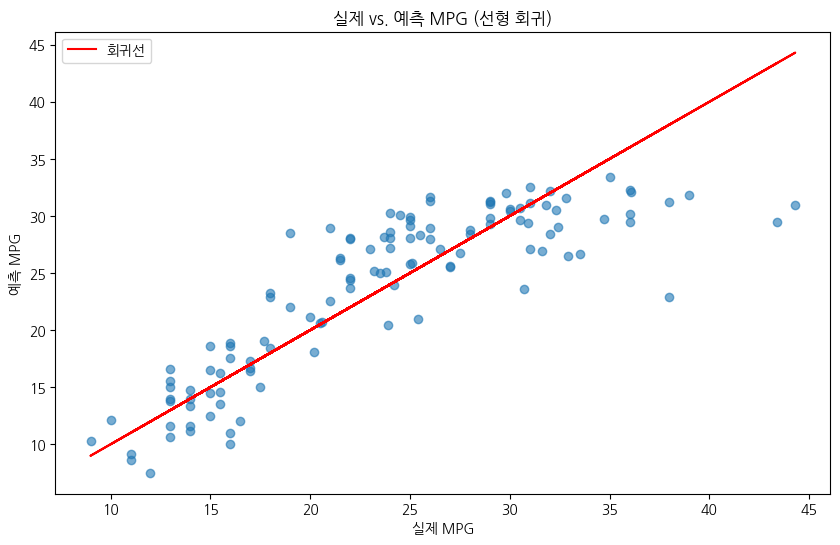

In [ ]:
# 실제 데이터와 예측값의 산점도 그래프
plt.figure(figsize=(10, 6))                          # 사이즈 설정, 산점도 그래프
plt.scatter(y_test, y_pred, alpha=0.6)               #y_test(테스트셋의 실제 MPG값)와 y_pred(모델 사용해서 테스트셋의 X 데이터를 이용해 예측한 mpg 값) 값을 산점도로 표현
plt.plot(y_test, y_test, color='r', label='회귀선')  # 회귀선 그리기
plt.xlabel('실제 MPG')
plt.ylabel('예측 MPG')
plt.title('실제 vs. 예측 MPG (선형 회귀)')
plt.legend()
plt.show()

### feature 무게, 연식, 원산지

In [ ]:
rdf2 = df[['weight','model year','origin']]
rdf2.head()

,weight,model year,origin
0,3504.0,70,1
1,3693.0,70,1
2,3436.0,70,1
3,3433.0,70,1
4,3449.0,70,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(rdf2, df_mpg, test_size = 0.3,  random_state = 7) # 70: 30

In [ ]:
Ir.fit(X_train,y_train)

LinearRegression()

In [ ]:
# 모델 정보 출력 (무게, 연식, 원산지 피쳐를 이용한 출력 값)
print('Ir.coef_:',Ir.coef_)
print('Ir.intercept_:',Ir.intercept_)
print('훈련 데이터셋의 R2:', Ir.score(X_train, y_train))
print('테스트 데이터셋의 R2:', Ir.score(X_test, y_test))

Ir.coef_: [-0.00590587  0.7607077   1.38567341]
Ir.intercept_: -19.00820596388881
훈련 데이터셋의 R2: 0.8193851434061319
테스트 데이터셋의 R2: 0.8112772059806433


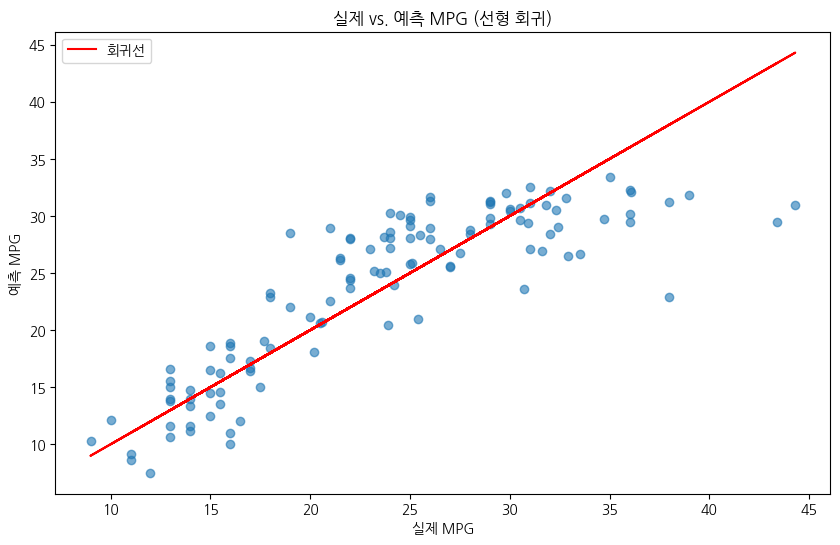

In [ ]:
# 실제 데이터와 예측값의 산점도 그래프
plt.figure(figsize=(10, 6))                          # 사이즈 설정, 산점도 그래프
plt.scatter(y_test, y_pred, alpha=0.6)               #y_test(테스트셋의 실제 MPG값)와 y_pred(모델 사용해서 테스트셋의 X 데이터를 이용해 예측한 mpg 값) 값을 산점도로 표현
plt.plot(y_test, y_test, color='r', label='회귀선')  # 회귀선 그리기
plt.xlabel('실제 MPG')
plt.ylabel('예측 MPG')
plt.title('실제 vs. 예측 MPG (선형 회귀)')
plt.legend()
plt.show()

## 모델 Ridge 사용

### 기본 feature 사용

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [ ]:
#데이터 분할(기본 피쳐 사용)
X_train, X_test, y_train, y_test = train_test_split(rdf, df_mpg, test_size=0.3, random_state=7)

In [ ]:
# 릿지 회귀 모델 생성 및 학습
ridge = Ridge(alpha=1.0)  # alpha는 정규화 강도를 조절하는 매개변수
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
# 테스트 데이터셋 예측
y_pred = ridge.predict(X_test)

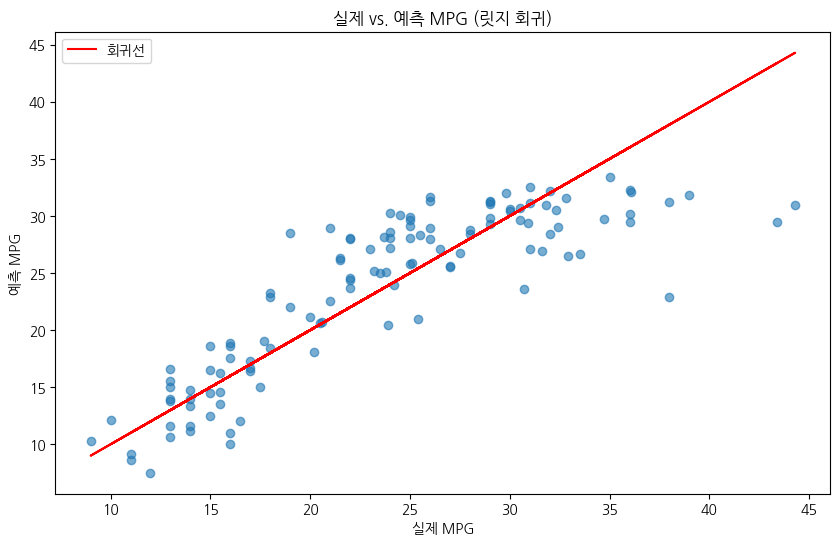

In [ ]:
# 실제 데이터와 예측값의 산점도 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(y_test, y_test, color='r', label='회귀선')  # 회귀선 그리기
plt.xlabel('실제 MPG')
plt.ylabel('예측 MPG')
plt.title('실제 vs. 예측 MPG (릿지 회귀)')
plt.legend()
plt.show()

In [ ]:
# R-squared 점수 출력
print('훈련 데이터셋의 R-squared:', ridge.score(X_train, y_train))
print('테스트 데이터셋의 R-squared:', ridge.score(X_test, y_test))

훈련 데이터셋의 R-squared: 0.697417072158164
테스트 데이터셋의 R-squared: 0.7210099311356561


### feature 무게, 연식, 원산지

In [ ]:
#데이터 분할(피쳐 무게, 연식, 원산지 사용)
X_train, X_test, y_train, y_test = train_test_split(rdf2, df_mpg, test_size=0.3, random_state=7)

In [ ]:
# 릿지 회귀 모델 생성 및 학습
ridge = Ridge(alpha=1.0)  # alpha는 정규화 강도를 조절하는 매개변수
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
# 테스트 데이터셋 예측
y_pred = ridge.predict(X_test)

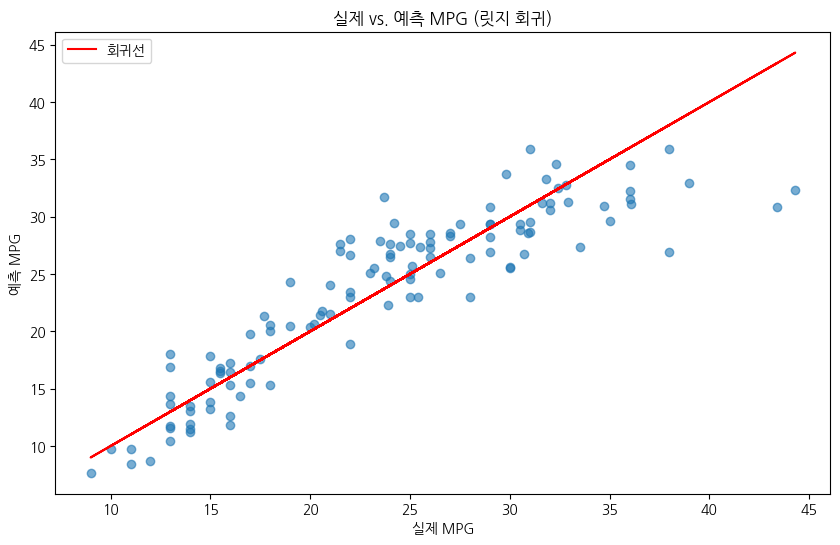

In [ ]:
# 실제 데이터와 예측값의 산점도 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(y_test, y_test, color='r', label='회귀선')  # 회귀선 그리기
plt.xlabel('실제 MPG')
plt.ylabel('예측 MPG')
plt.title('실제 vs. 예측 MPG (릿지 회귀)')
plt.legend()
plt.show()

In [ ]:
# R-squared 점수 출력
print('훈련 데이터셋의 R-squared:', ridge.score(X_train, y_train))
print('테스트 데이터셋의 R-squared:', ridge.score(X_test, y_test))

훈련 데이터셋의 R-squared: 0.8193841368939256
테스트 데이터셋의 R-squared: 0.8114085775597935


## 모델 Lasso 사용

### 기본 feature 선언

0.6974170721181139
0.7210084602980533


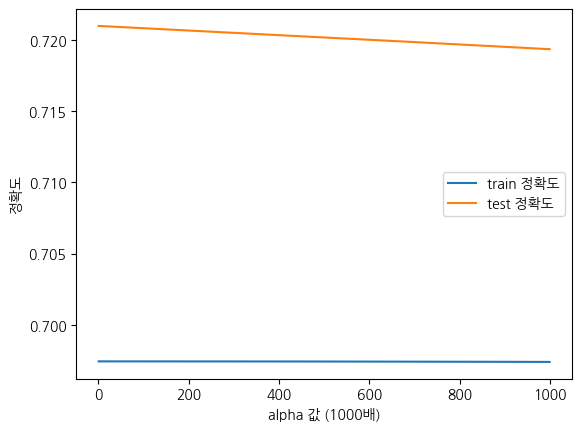

In [ ]:
from sklearn.linear_model import Lasso

rdf = df[['displacement','horsepower','weight']]

X_train, X_test, y_train, y_test = train_test_split(rdf, df_mpg, test_size = 0.3,  random_state = 7)

train_set = []
test_set = []

for n in range(1,1000):

# range (start, finish, gab)

  lasso = Lasso(alpha=0.001*n).fit(X_train, y_train) # alpha=1 규제 기본값

  train_set.append(lasso.score(X_train, y_train))
  test_set.append(lasso.score(X_test, y_test))


print(max(train_set))
print(max(test_set))

plt.figure(dpi = 100)

plt.plot(range(1,1000)  , train_set, label='train 정확도')

plt.plot(range(1,1000)  , test_set, label='test 정확도')

plt.xlabel('alpha 값 (1000배)')
plt.ylabel('정확도')
plt.legend()
plt.show()


### feature 선언 마력, 배기량, 무게 ,속가

0.69742140125998
0.72107615101251


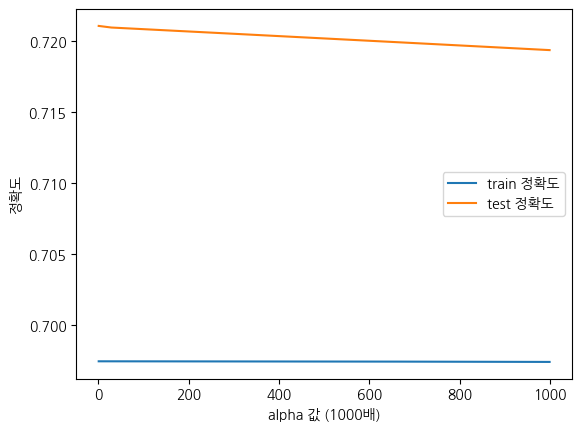

In [ ]:
df_ex_1 = df[['displacement','horsepower','weight','acceleration']]

X_train, X_test, y_train, y_test = train_test_split(df_ex_1, df_mpg, test_size = 0.3,  random_state = 7)

train_set = []
test_set = []

for n in range(1,1000):

  lasso = Lasso(alpha=0.001*n).fit(X_train, y_train) # alpha=1 규제 기본값

  train_set.append(lasso.score(X_train, y_train))
  test_set.append(lasso.score(X_test, y_test))


print(max(train_set))
print(max(test_set))

plt.figure(dpi = 100)

plt.plot(range(1,1000)  , train_set, label='train 정확도')

plt.plot(range(1,1000)  , test_set, label='test 정확도')

plt.xlabel('alpha 값 (1000배)')
plt.ylabel('정확도')
plt.legend()
plt.show()

### feature 선언 마력 배기량 무게 모델

0.8067814247755745
0.8105877592405457


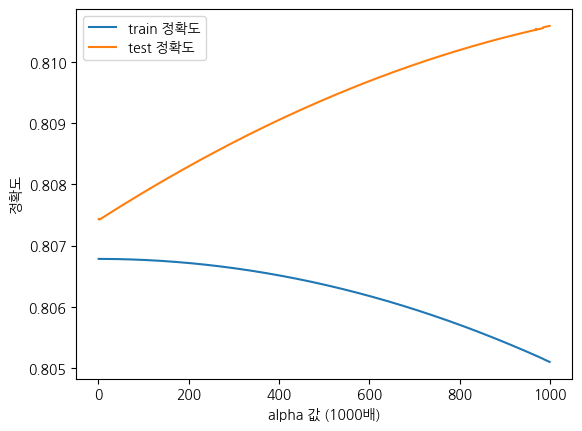

In [ ]:
df_ex_2 = df[['displacement','horsepower','weight','name']]


X_train, X_test, y_train, y_test = train_test_split(df_ex_2, df_mpg, test_size = 0.3,  random_state = 7)

train_set = []
test_set = []

for n in range(1,1000):

  lasso = Lasso(alpha=0.001*n).fit(X_train, y_train) # alpha=1 규제 기본값

  train_set.append(lasso.score(X_train, y_train))
  test_set.append(lasso.score(X_test, y_test))


print(max(train_set))
print(max(test_set))

plt.figure(dpi = 100)

plt.plot(range(1,1000)  , train_set, label='train 정확도')

plt.plot(range(1,1000)  , test_set, label='test 정확도')

plt.xlabel('alpha 값 (1000배)')
plt.ylabel('정확도')
plt.legend()
plt.show()

### feature 배기량 무게 모델

In [ ]:
df_ex_3 = df[['displacement','weight','name']]

X_train, X_test, y_train, y_test = train_test_split(df_ex_3, df_mpg, test_size = 0.3,  random_state = 7) # 70: 30

train_set = []
test_set = []

for n in range(1,1000):

  lasso = Lasso(alpha=0.001*n).fit(X_train, y_train) # alpha=1 규제 기본값

  train_set.append(lasso.score(X_train, y_train))
  test_set.append(lasso.score(X_test, y_test))


print(max(train_set))
print(max(test_set))

plt.figure(dpi = 100)

plt.plot(range(1,1000)  , train_set, label='train 정확도')

plt.plot(range(1,1000)  , test_set, label='test 정확도')

plt.xlabel('alpha 값 (1000배)')
plt.ylabel('정확도')
plt.legend()
plt.show()

ValueError: ignored

### featuer 무게 마력 모델 (당선)

0.8063480397709509
0.8119112535196298


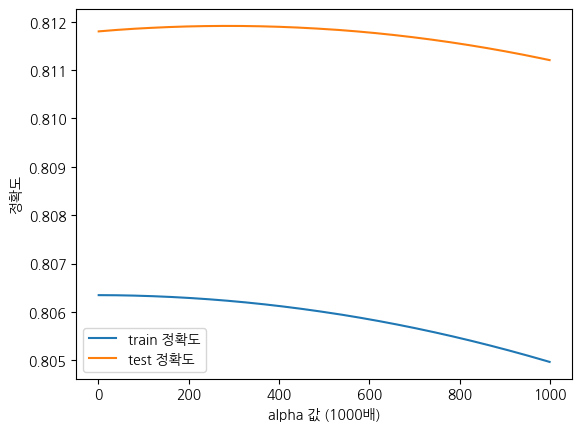

In [ ]:
df_ex_4 = df.drop(['horsepower','acceleration','origin','mpg','name','cylinders'], axis=1 )

X_train, X_test, y_train, y_test = train_test_split(df_ex_4, df_mpg, test_size = 0.3,  random_state = 7) # 70: 30

train_set = []
test_set = []

for n in range(1,1000):

  lasso = Lasso(alpha=0.001*n).fit(X_train, y_train) # alpha=1 규제 기본값

  train_set.append(lasso.score(X_train, y_train))
  test_set.append(lasso.score(X_test, y_test))


print(max(train_set))
print(max(test_set))

plt.figure(dpi = 100)

plt.plot(range(1,1000)  , train_set, label='train 정확도')

plt.plot(range(1,1000)  , test_set, label='test 정확도')

plt.xlabel('alpha 값 (1000배)')
plt.ylabel('정확도')
plt.legend()
plt.show()

0.8193851025246458
0.8152338532070128


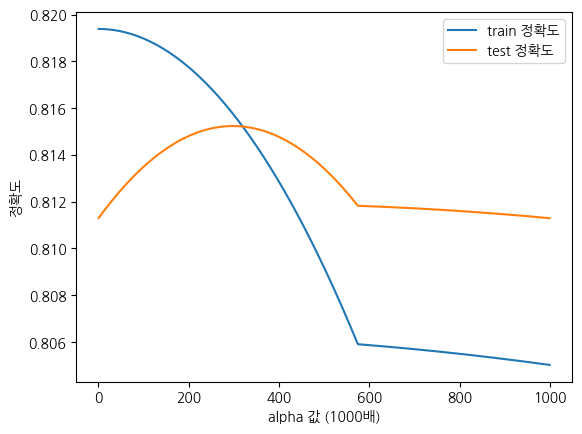

In [ ]:
df_ex_5 = df[['weight','model year','origin']]

X_train, X_test, y_train, y_test = train_test_split(df_ex_5, df_mpg, test_size = 0.3,  random_state = 7) # 70: 30

train_set = []
test_set = []

for n in range(1,1000):

  lasso = Lasso(alpha=0.001*n).fit(X_train, y_train) # alpha=1 규제 기본값

  train_set.append(lasso.score(X_train, y_train))
  test_set.append(lasso.score(X_test, y_test))


print(max(train_set))
print(max(test_set))

plt.figure(dpi = 100)

plt.plot(range(1,1000)  , train_set, label='train 정확도')

plt.plot(range(1,1000)  , test_set, label='test 정확도')

plt.xlabel('alpha 값 (1000배)')
plt.ylabel('정확도')
plt.legend()
plt.show()